## Methodology

- Measured...

In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [60]:
pose_columns = list(["time", "type", "x", "y", "z"])

list_of_smoothed_path_df = list()

smoothed_path_df = pd.DataFrame(columns=pose_columns)
with open('/home/locomotion/latency_evaluations/pose_uncertainty_0.txt') as f:
    lines = f.readlines()
    first_time = float(lines[1].split()[0])
    print first_time
    
    for line in lines:    
        words = line.split()
        if words[0] == "NEW_SMOOTHED_PATH":
            print words[0]
            if not smoothed_path_df.empty:
                list_of_smoothed_path_df.append(smoothed_path_df)
            smoothed_path_df = pd.DataFrame(columns=pose_columns)
        else:
            for index,val in enumerate(words):
                words[index] = float(val)
            j = 1
            for i in range(4):
                if i == 0:
                    pose_type = "pose_smoothed"
                if i == 1:
                    pose_type = "pose_available"
                if i == 2:
                    pose_type = "pose_fp"
                if i == 3:
                    pose_type = "pose"
                smoothed_path_df_add = pd.DataFrame([[words[0]-first_time, pose_type, words[j], words[j+1], words[j+2]]], columns=pose_columns)
                smoothed_path_df = smoothed_path_df.append(smoothed_path_df_add, ignore_index=True)
                j = j + 3
            
        

1487624064.89
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH


In [61]:
print len(list_of_smoothed_path_df)

16


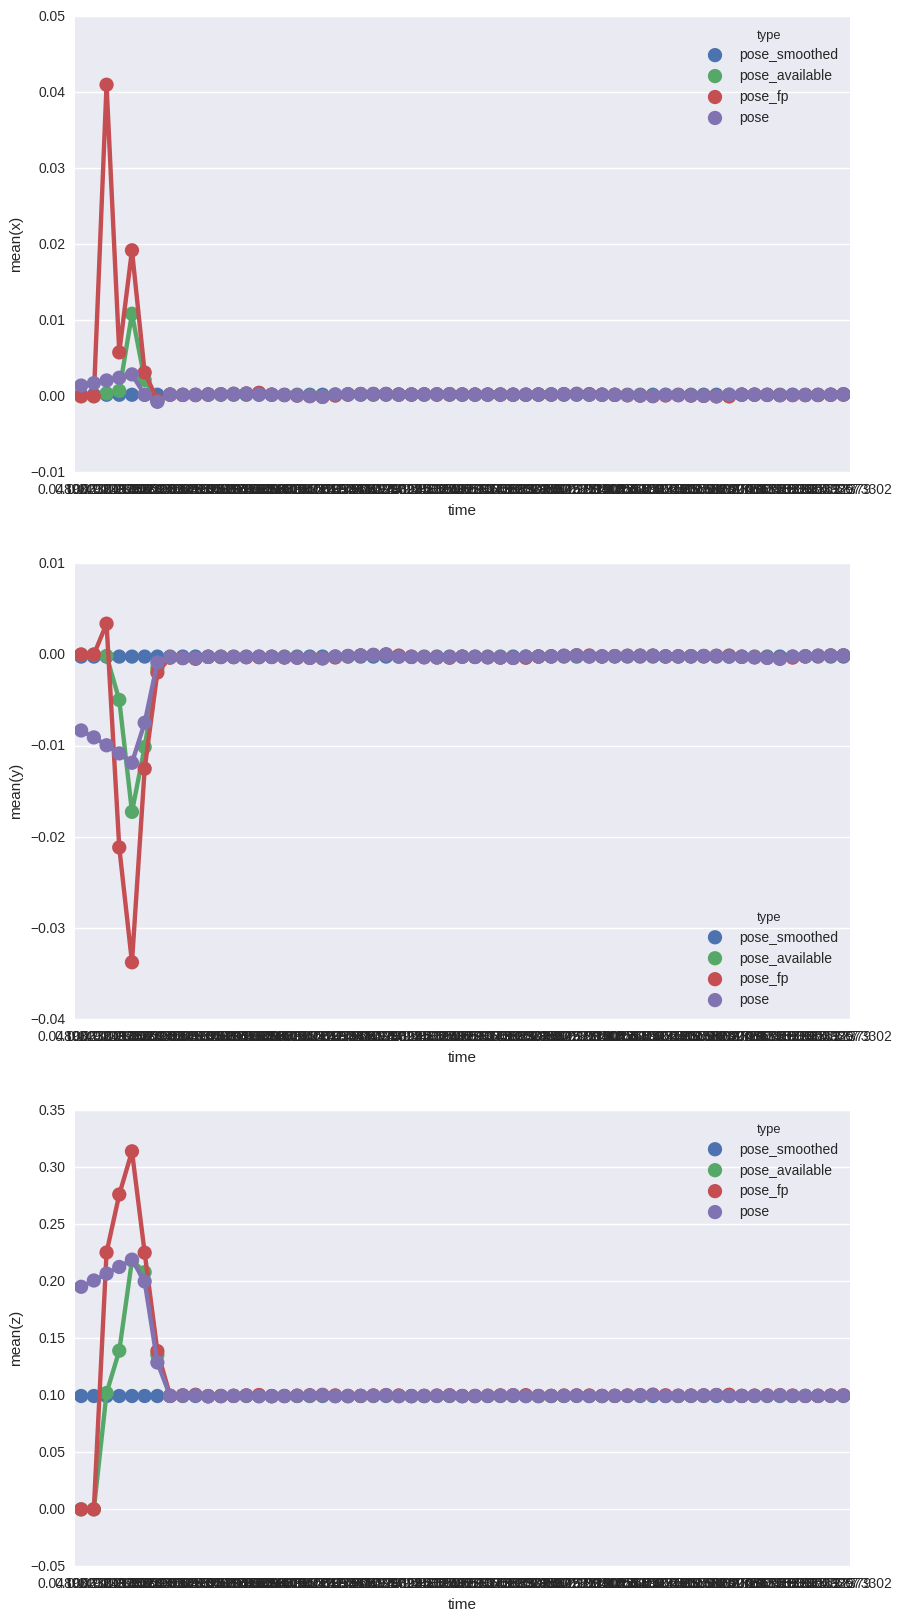

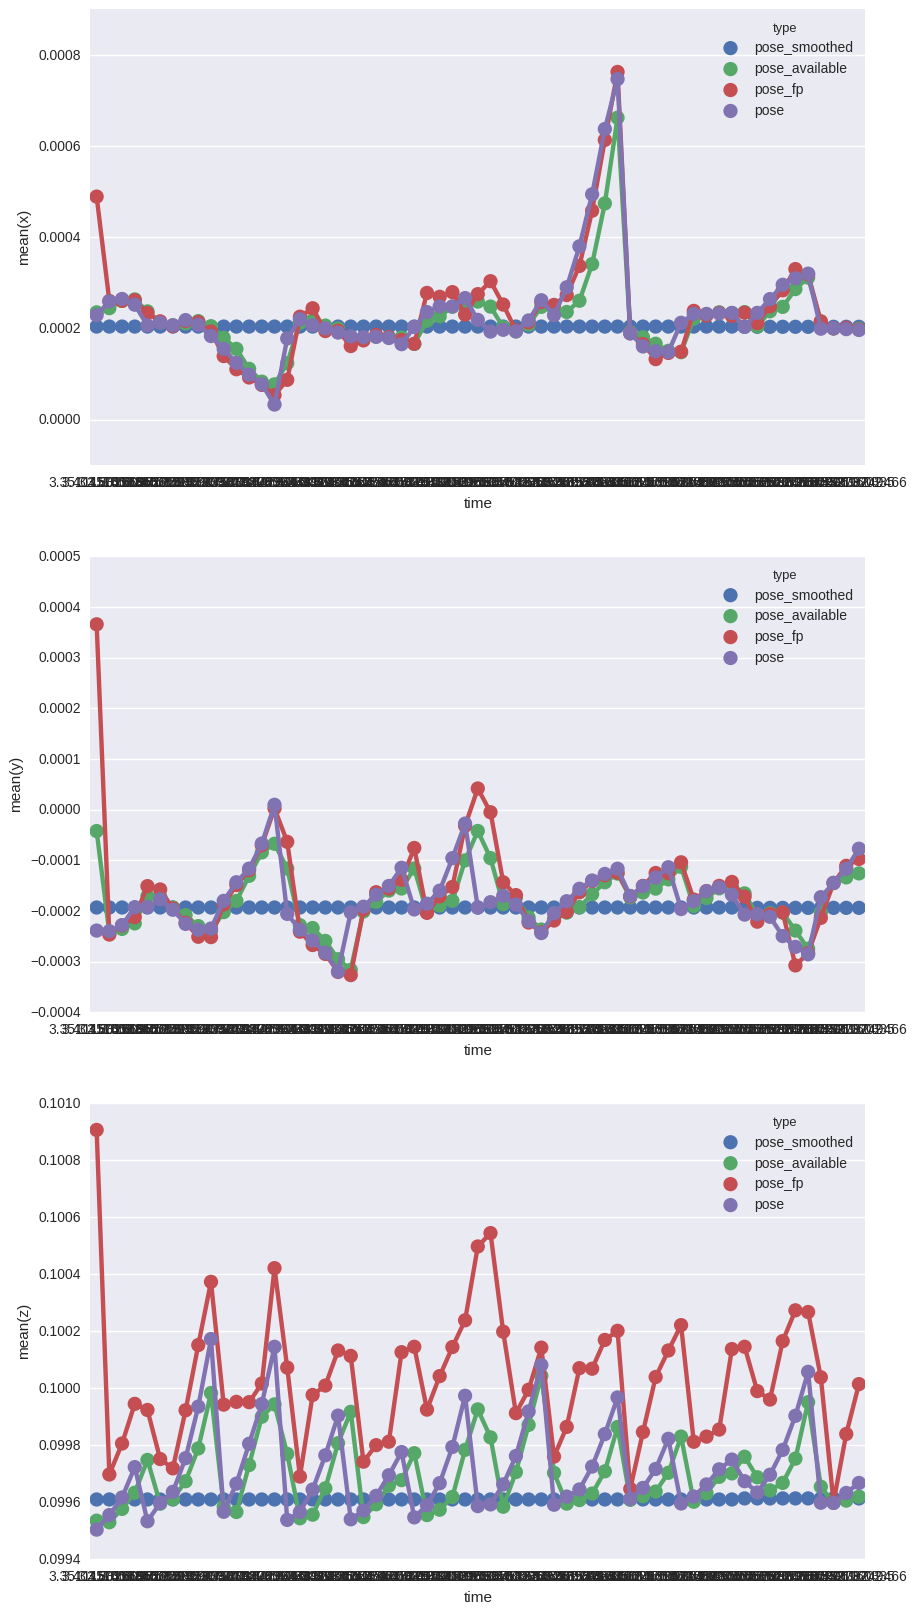

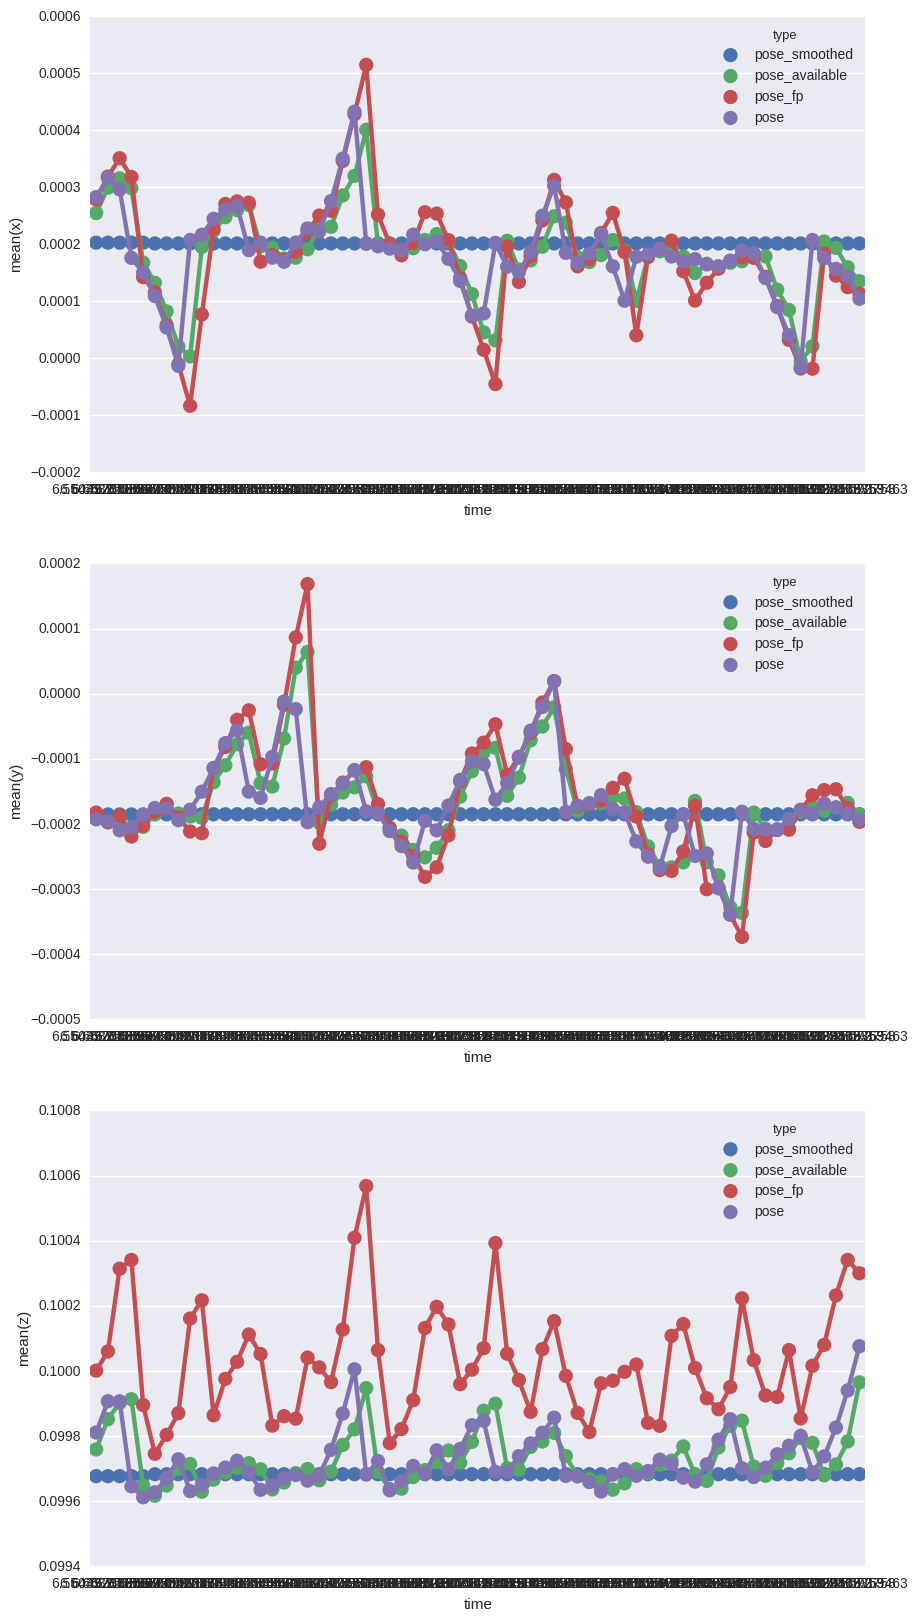

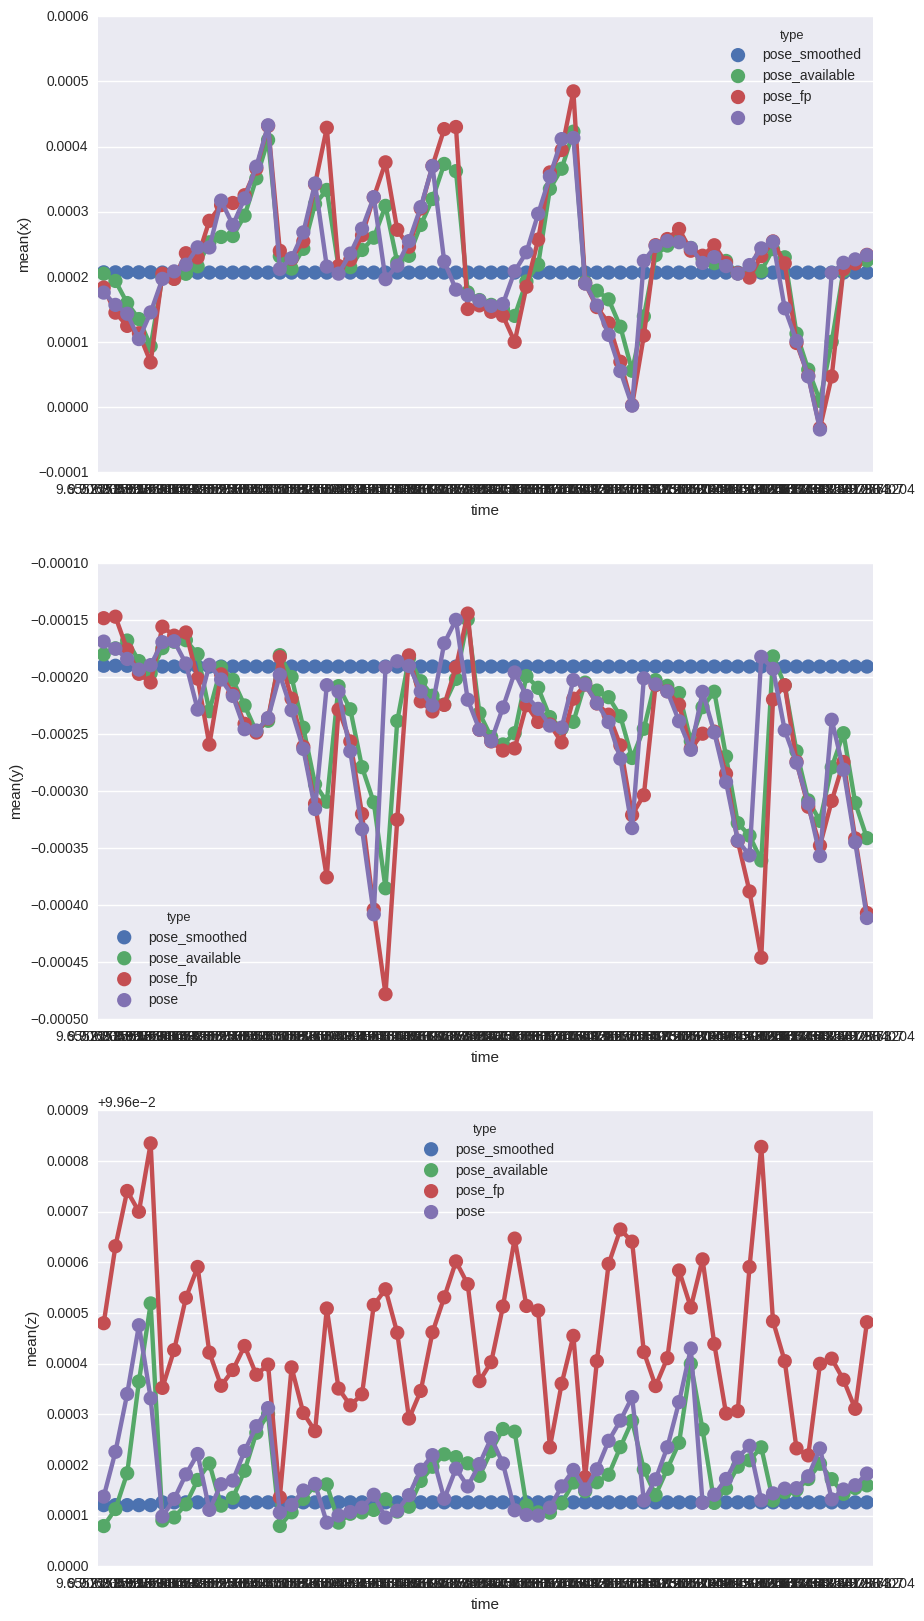

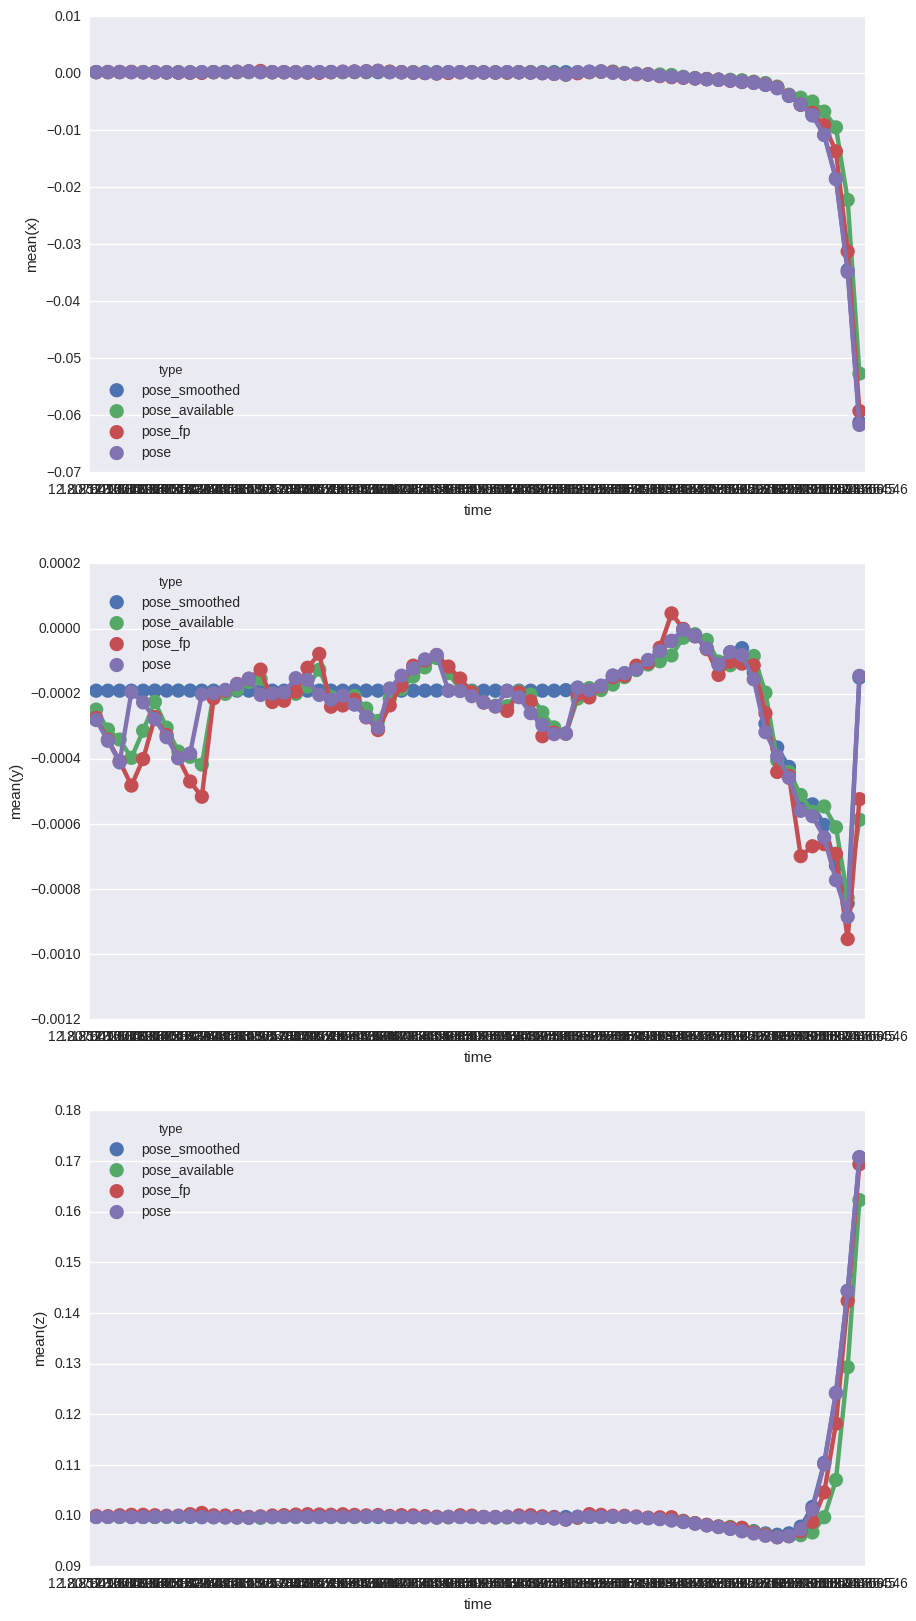

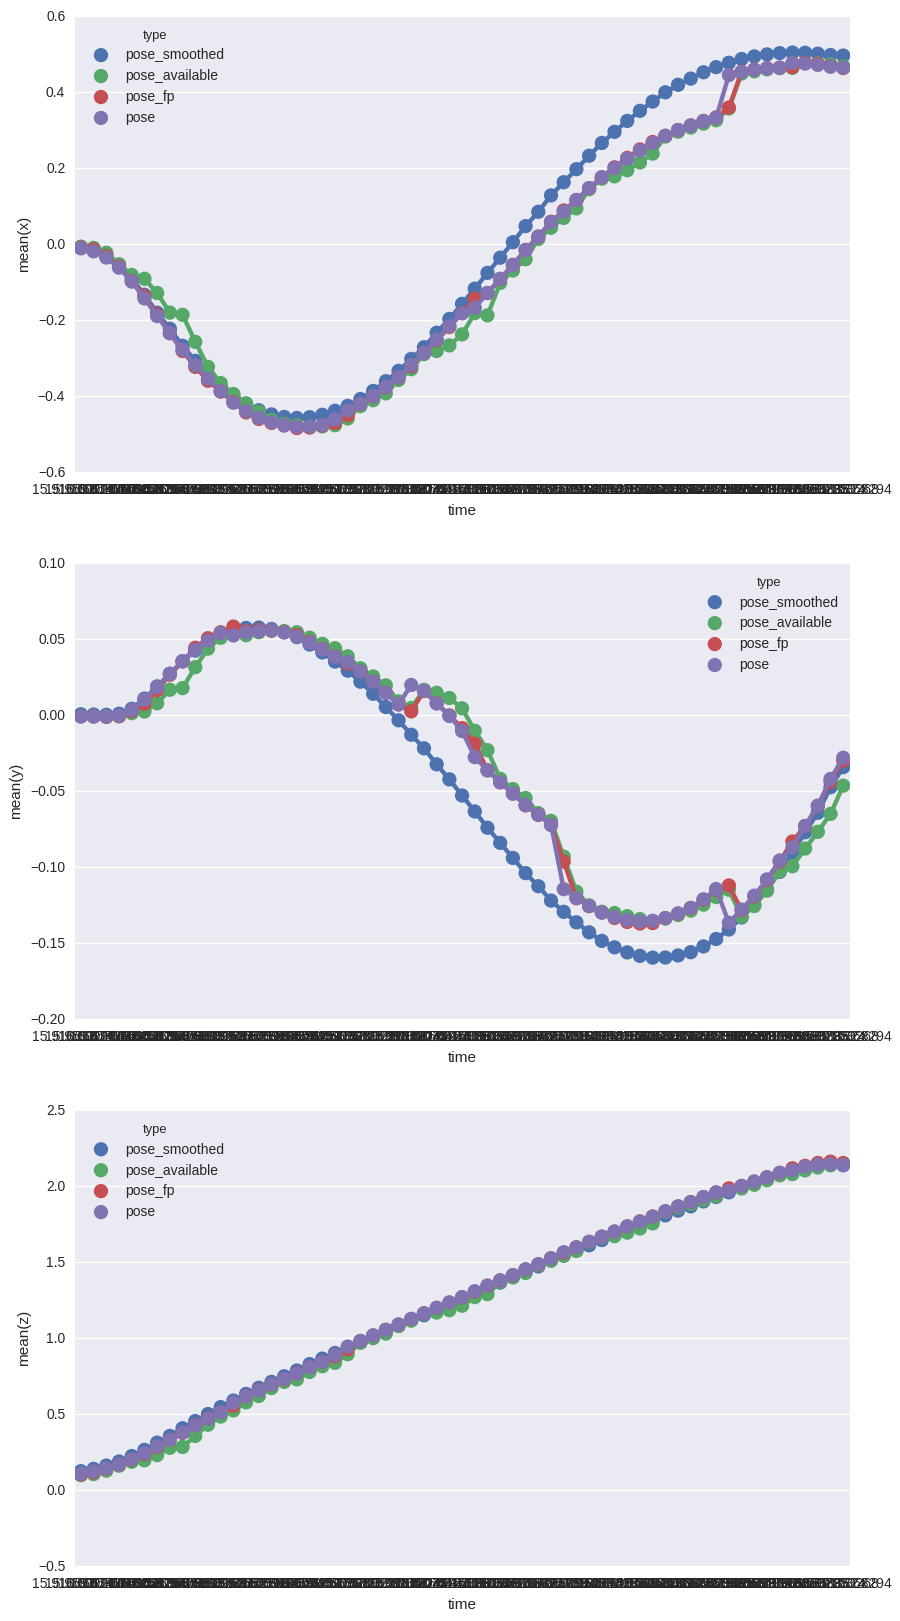

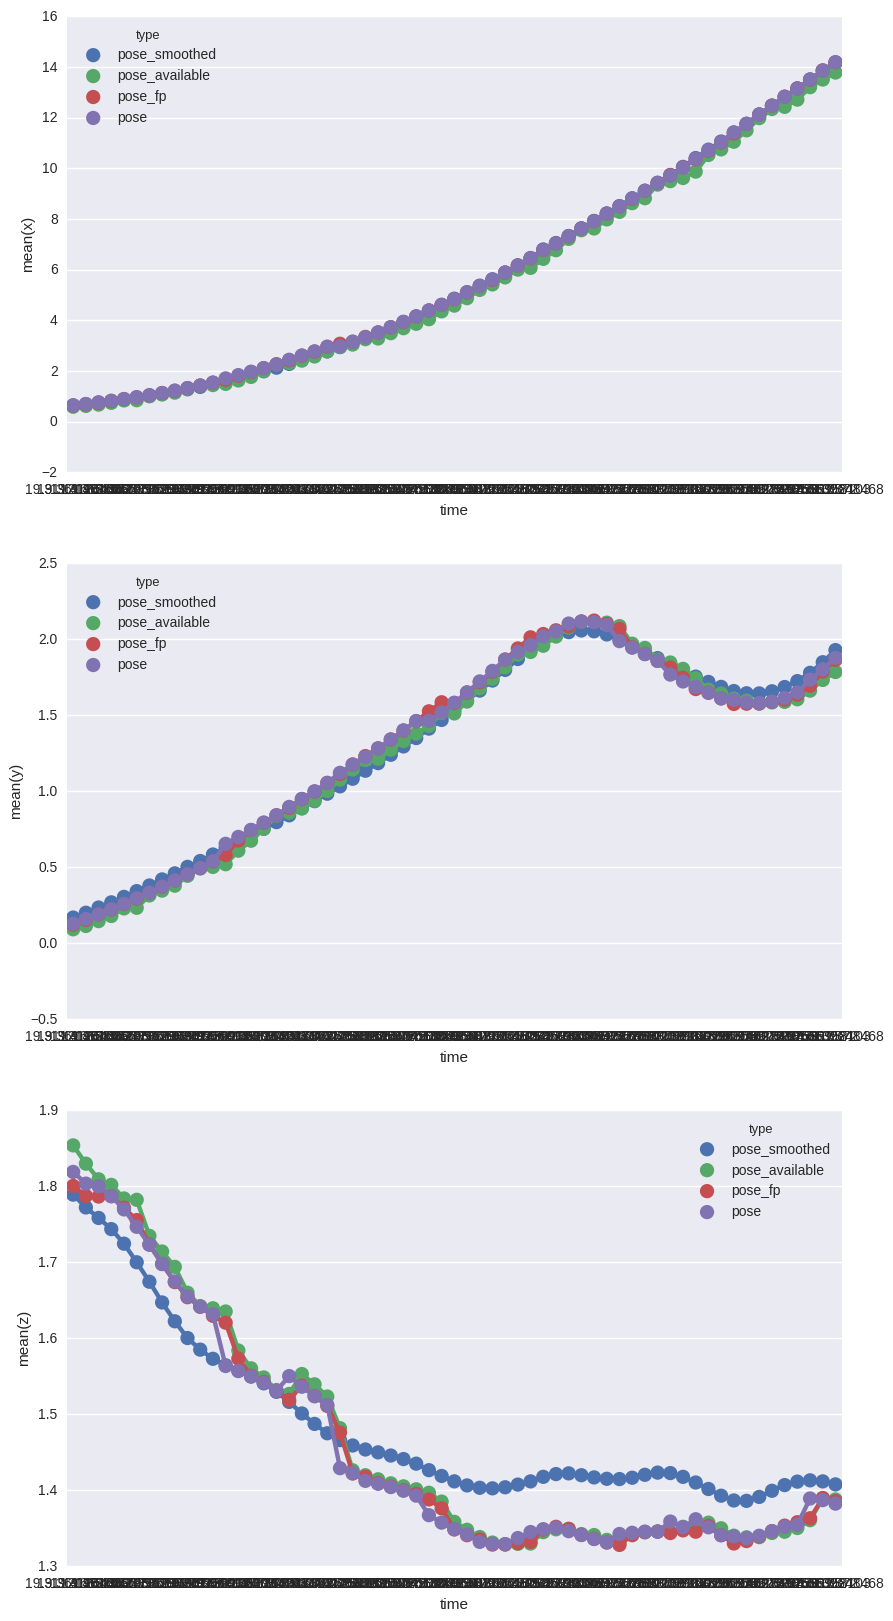

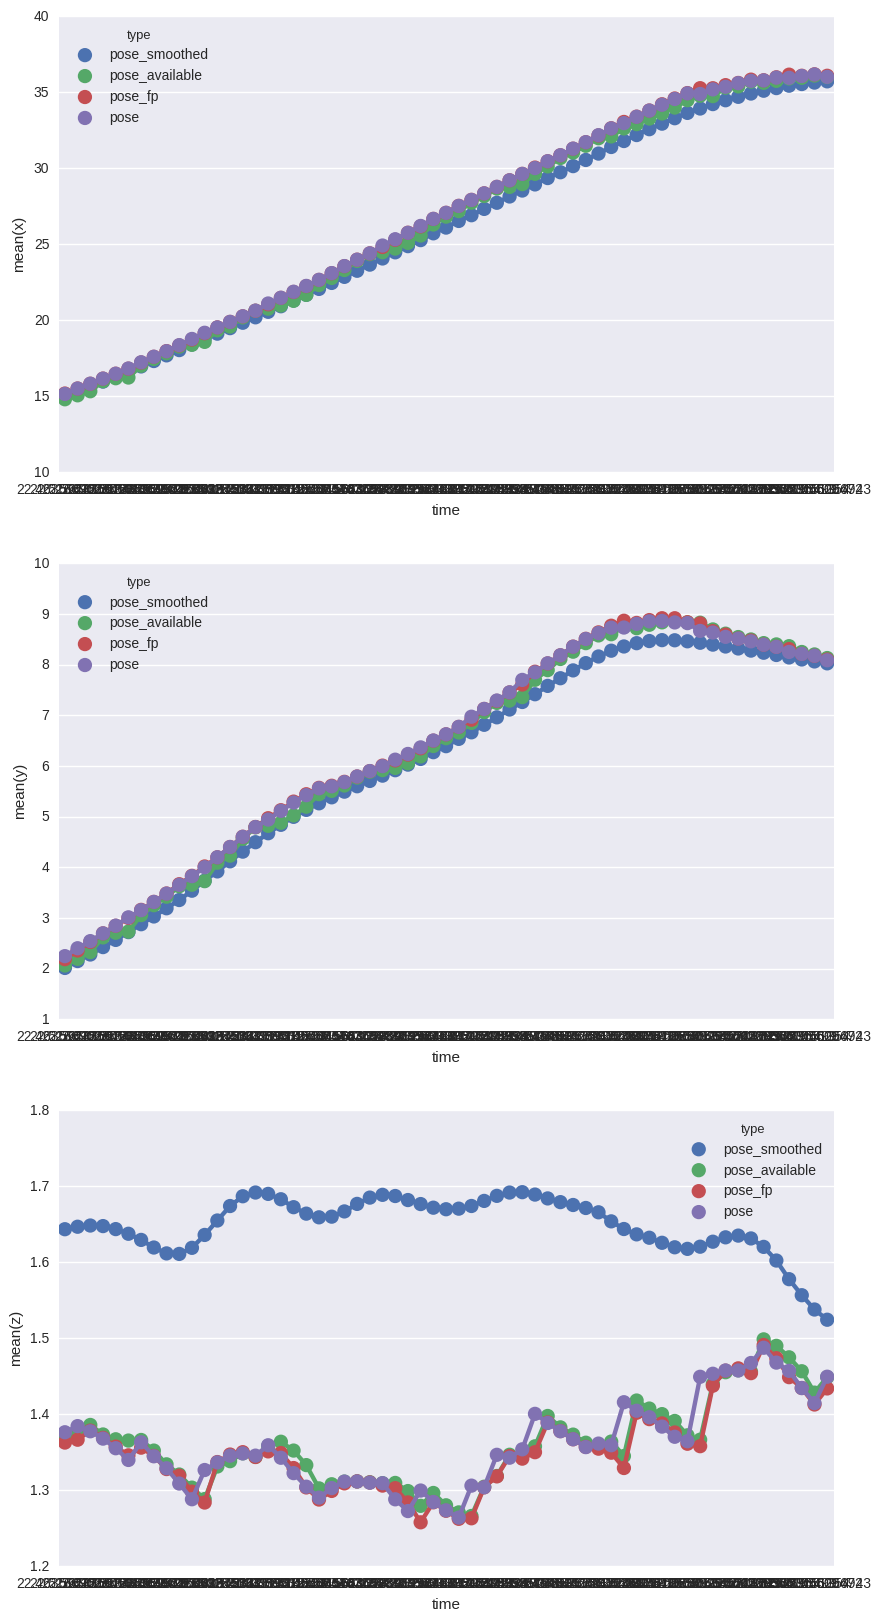

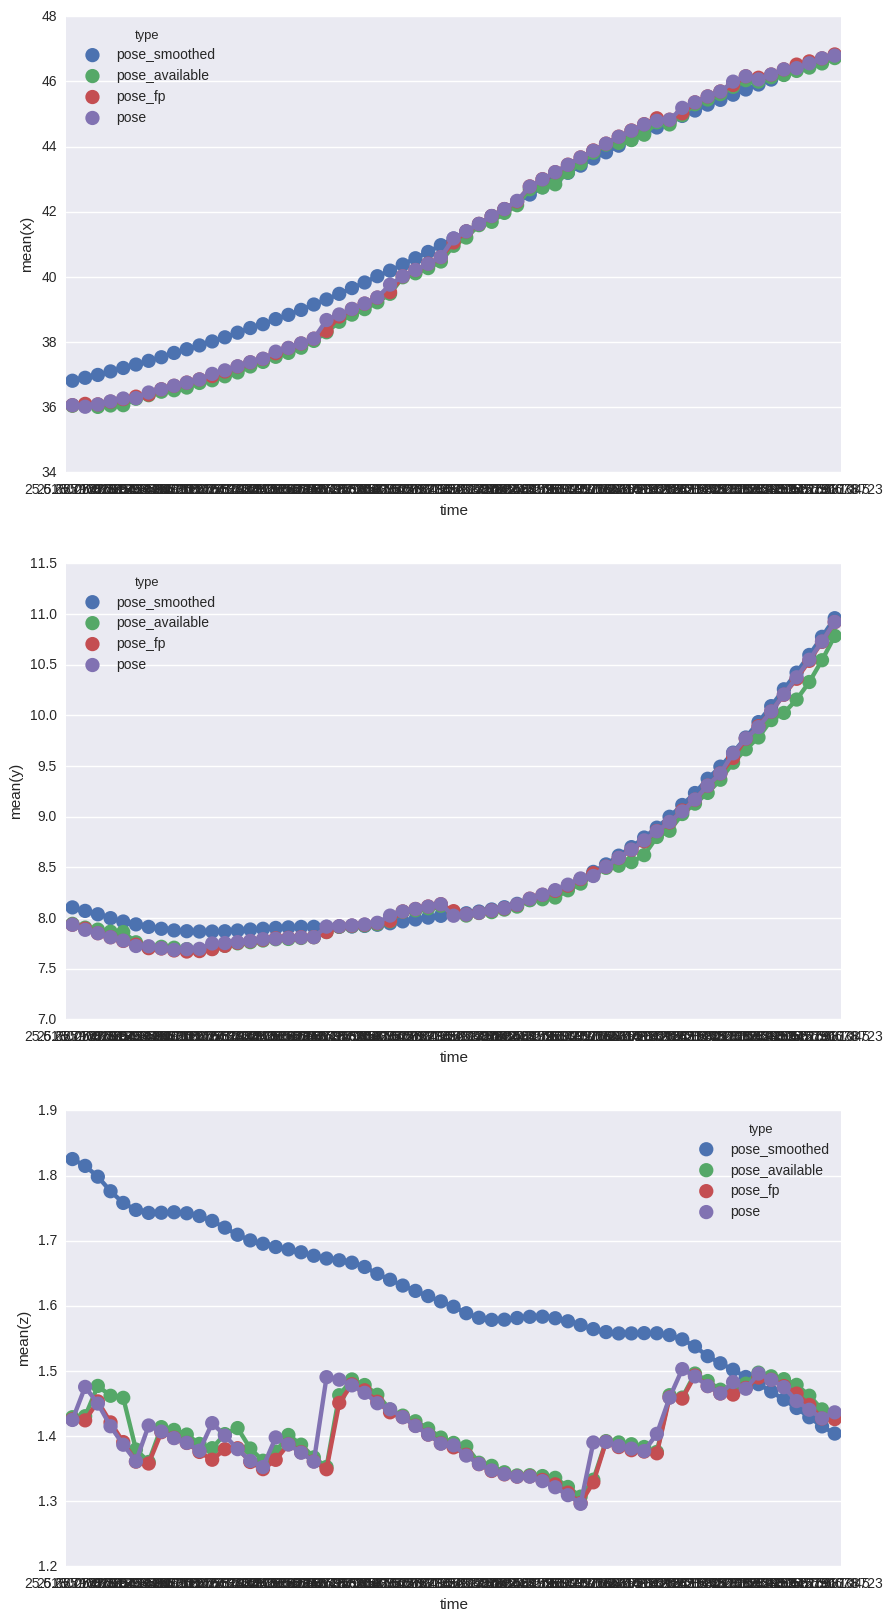

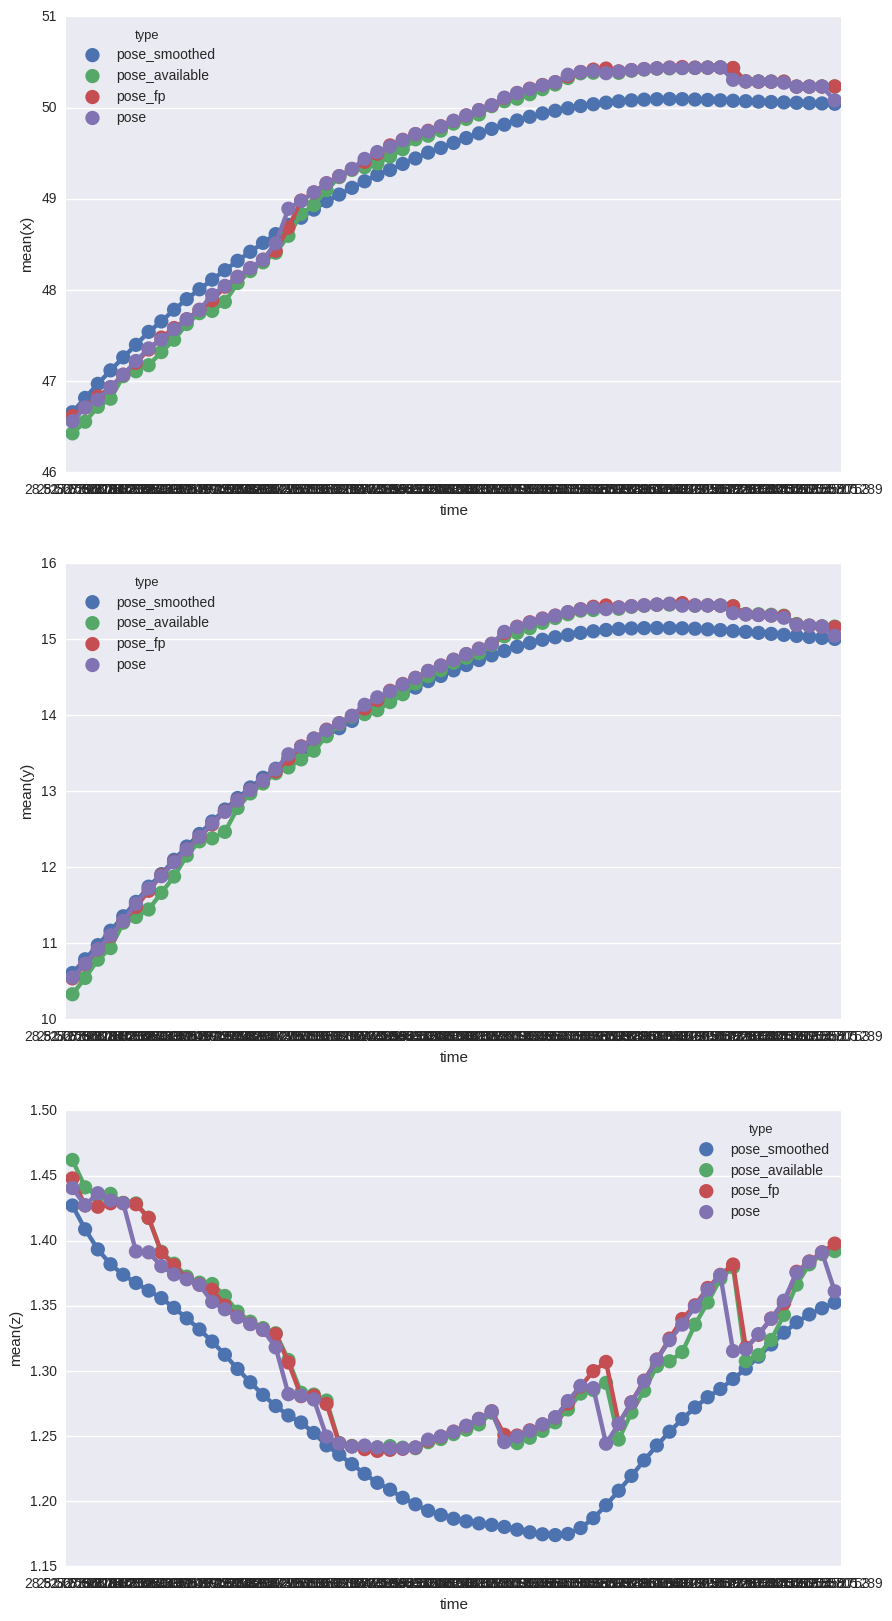

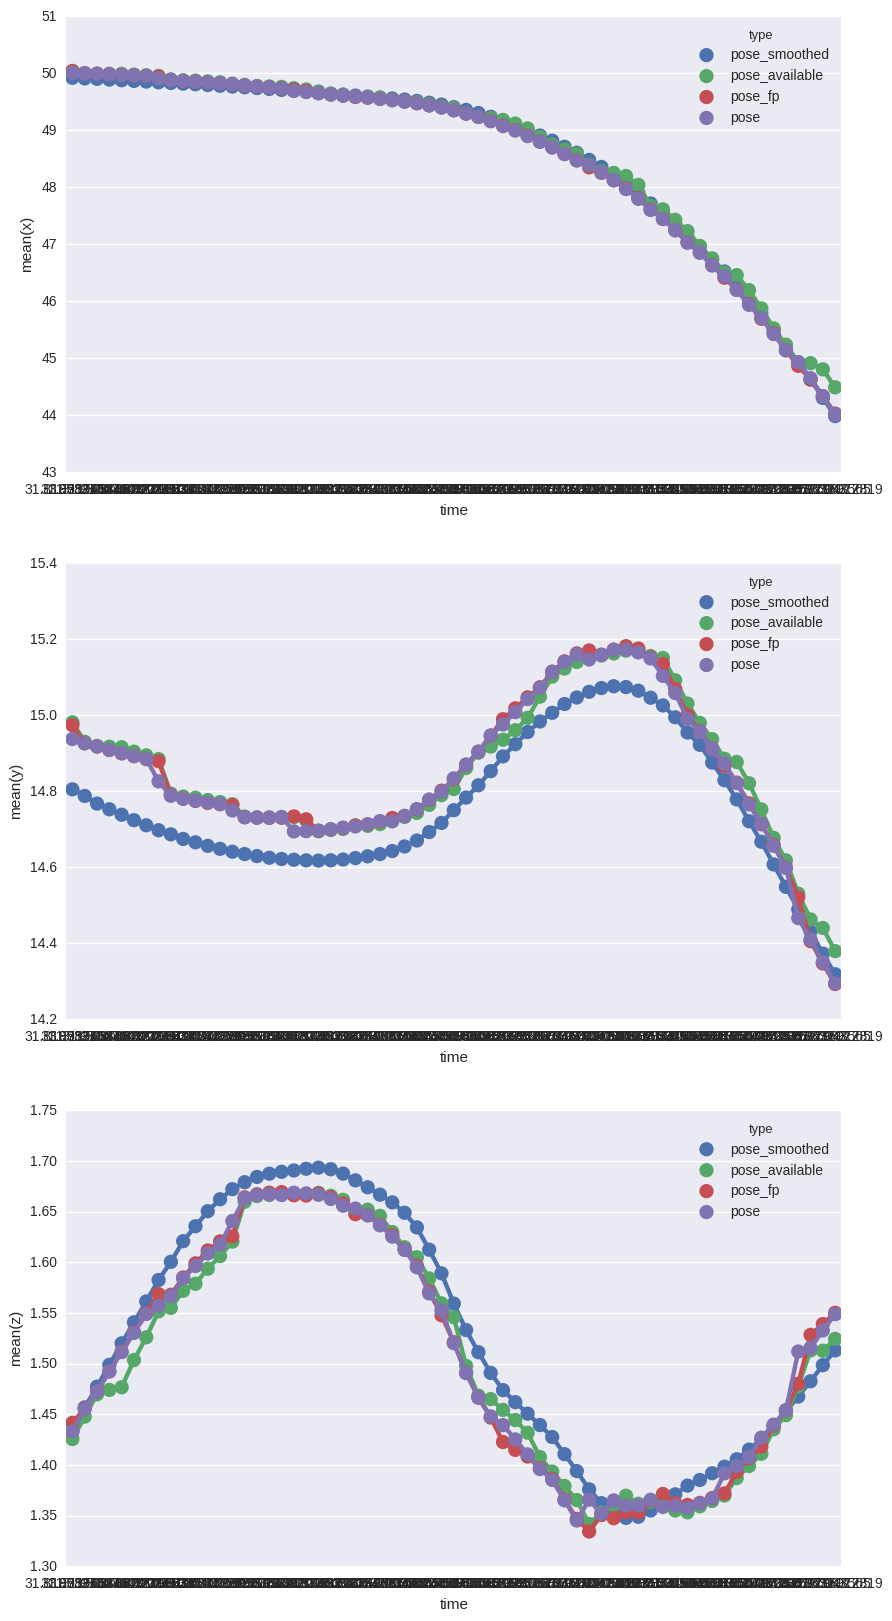

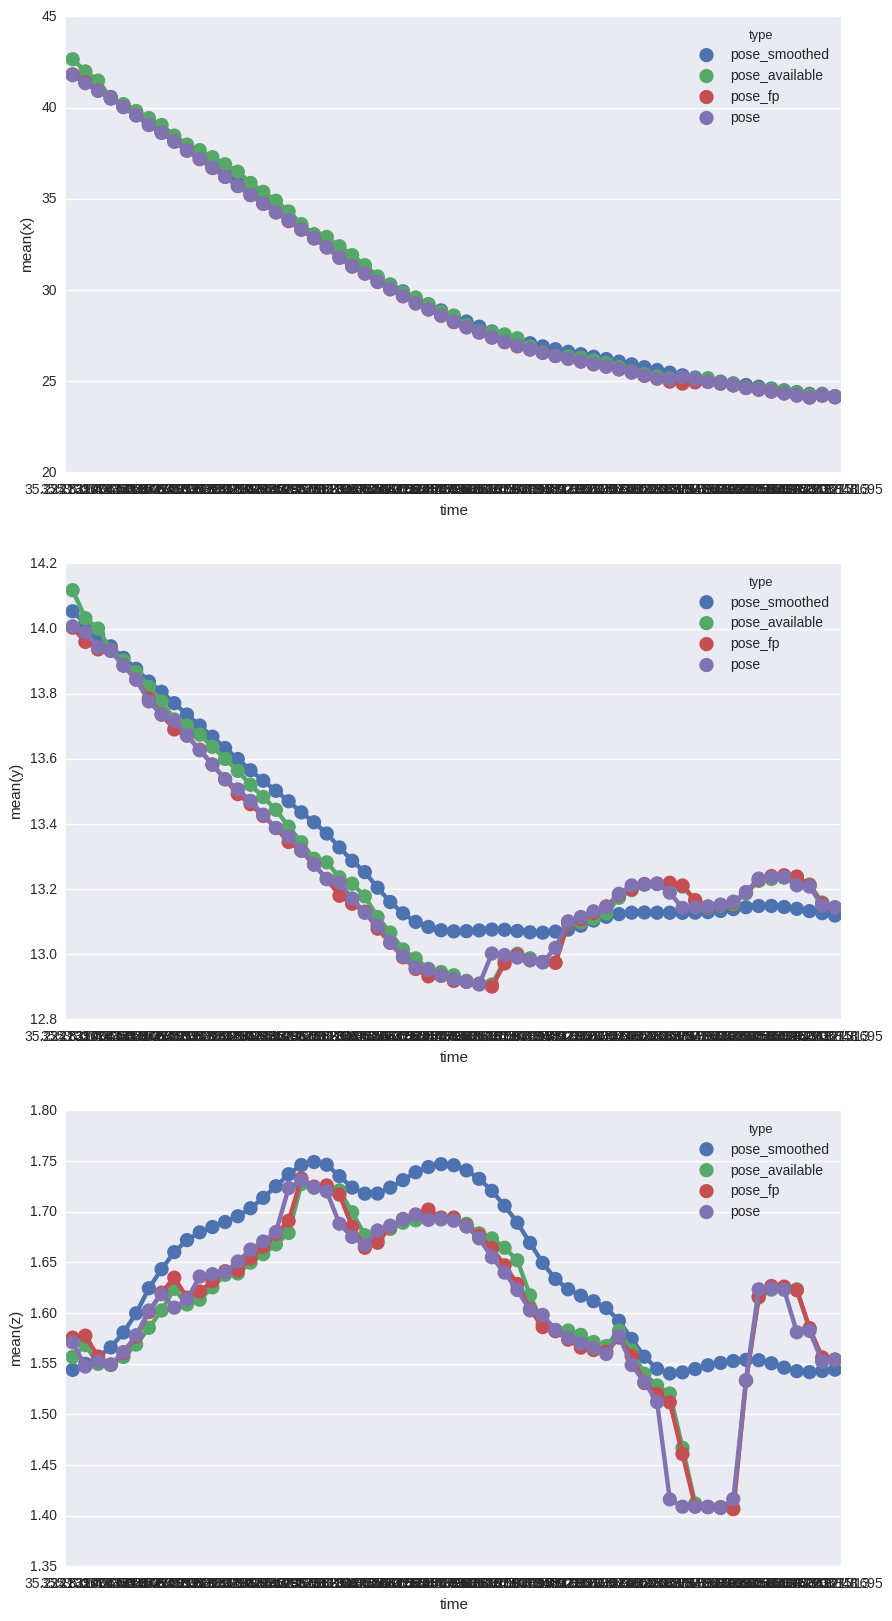

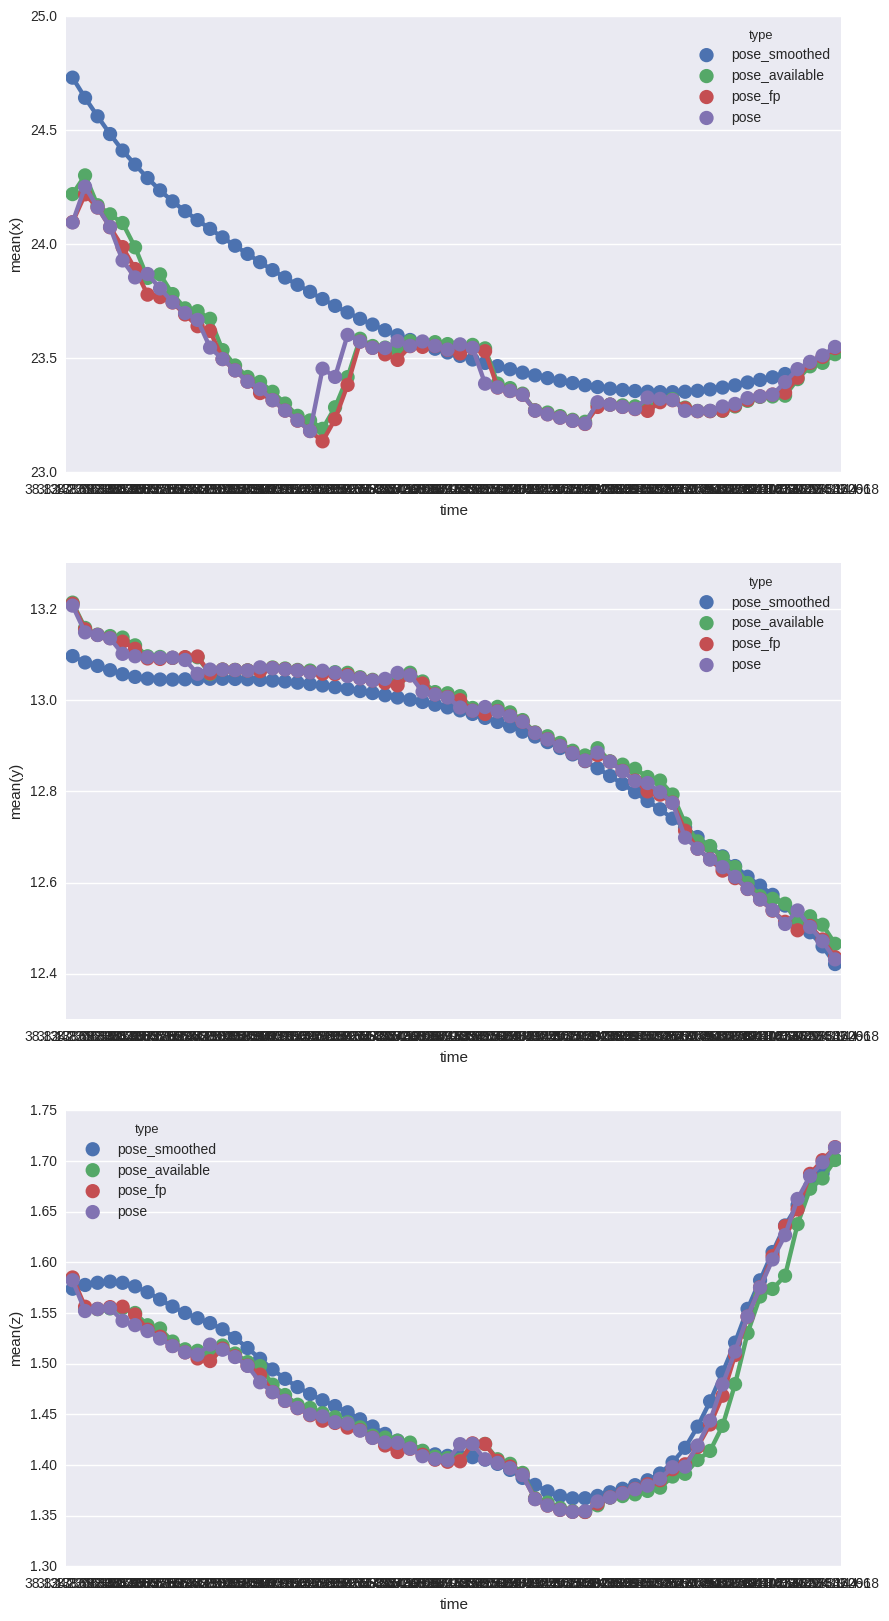

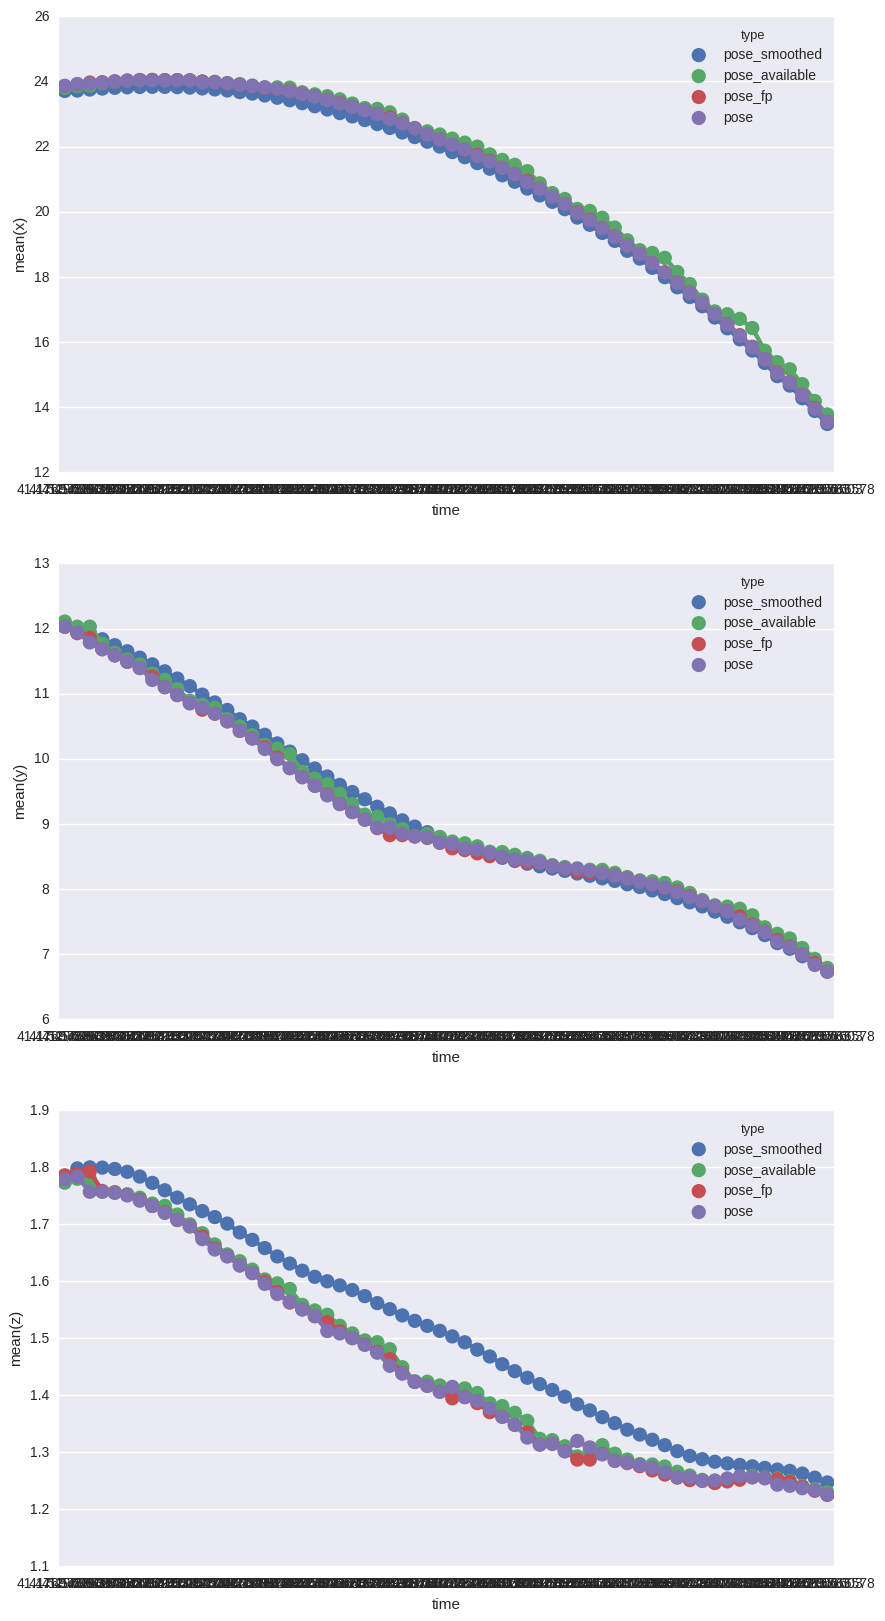

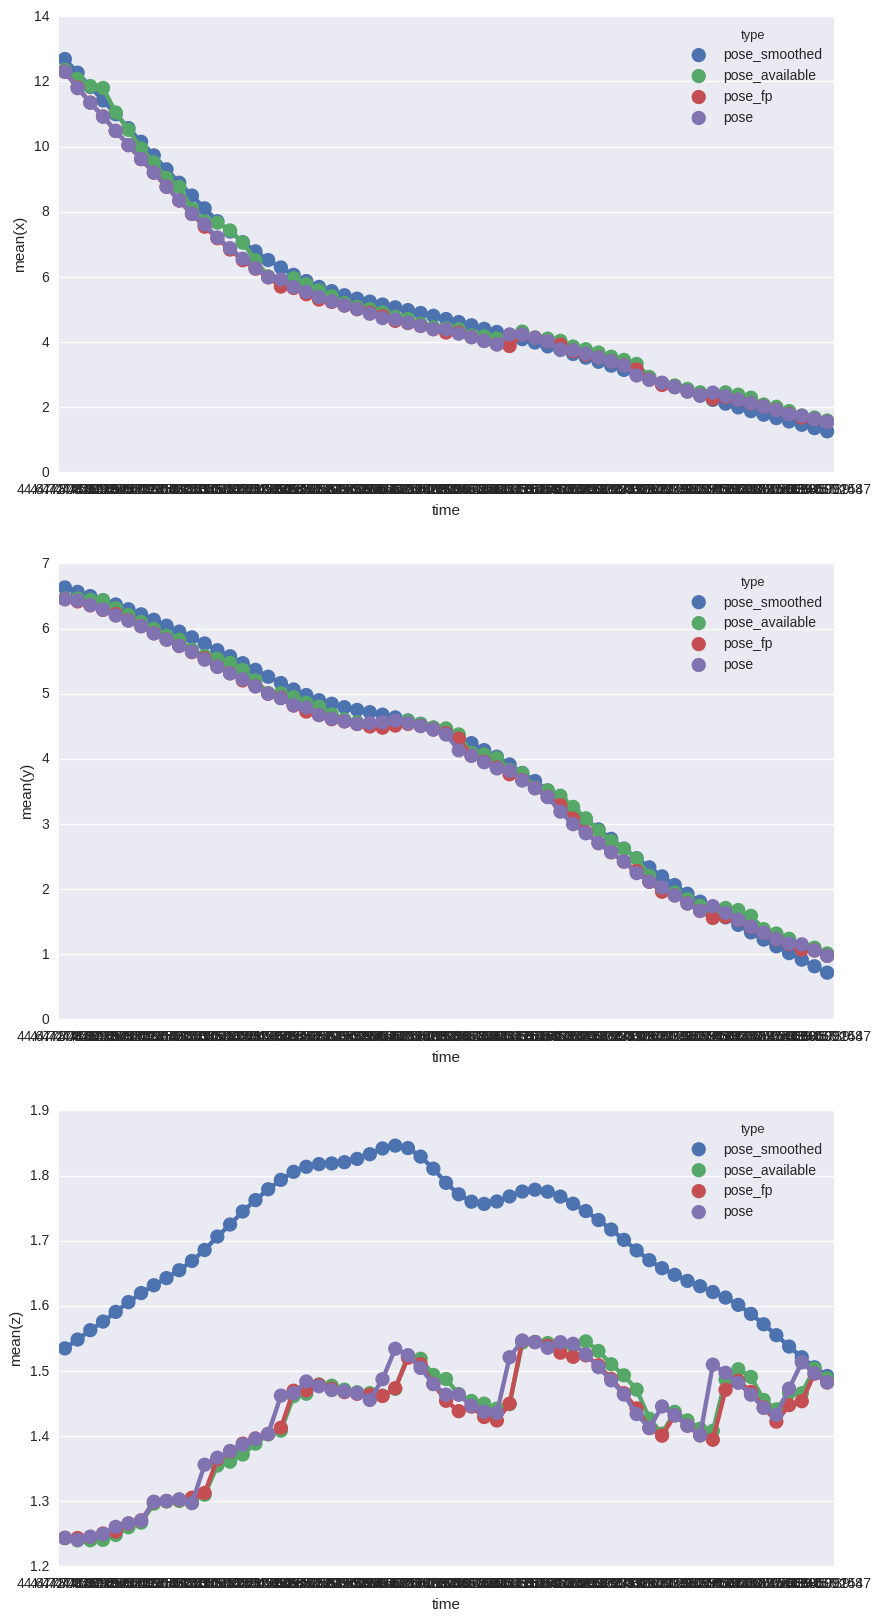

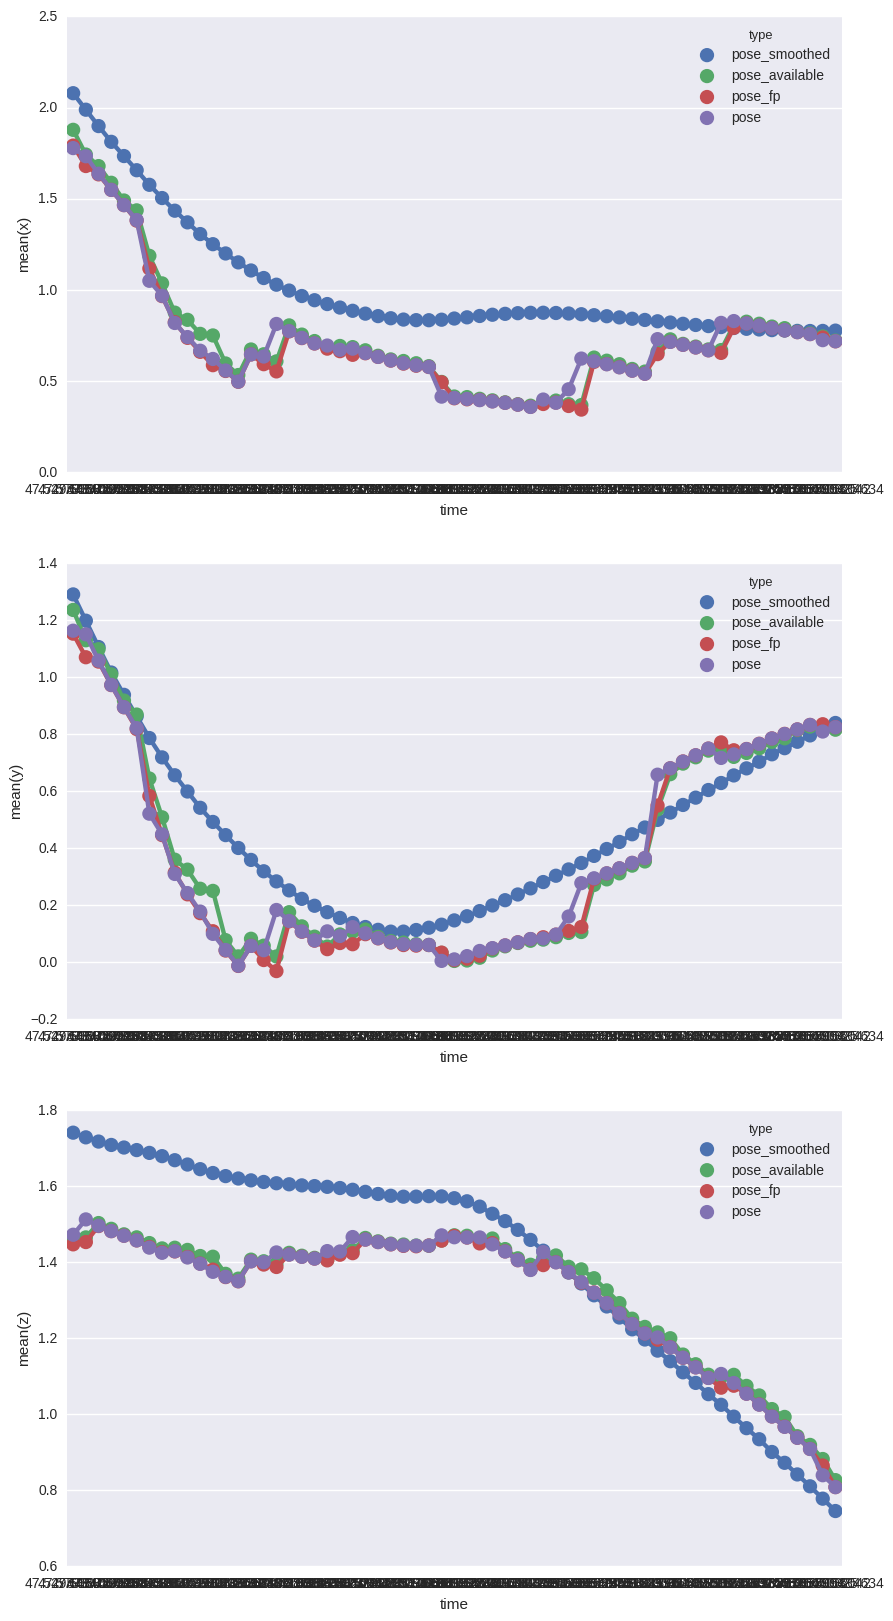

In [66]:
sns.set_style("darkgrid")

for index, value in enumerate(list_of_smoothed_path_df):
    f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,20))
    ax1 = sns.pointplot(x="time", y="x", hue="type", data=value, ax=ax1)
    ax2 = sns.pointplot(x="time", y="y", hue="type", data=value, ax=ax2)
    ax3 = sns.pointplot(x="time", y="z", hue="type", data=value, ax=ax3)
    plt.show()

## Latencies in simulation

In our Unity/Drake simulator, following latencies are measured for all messages coming in:

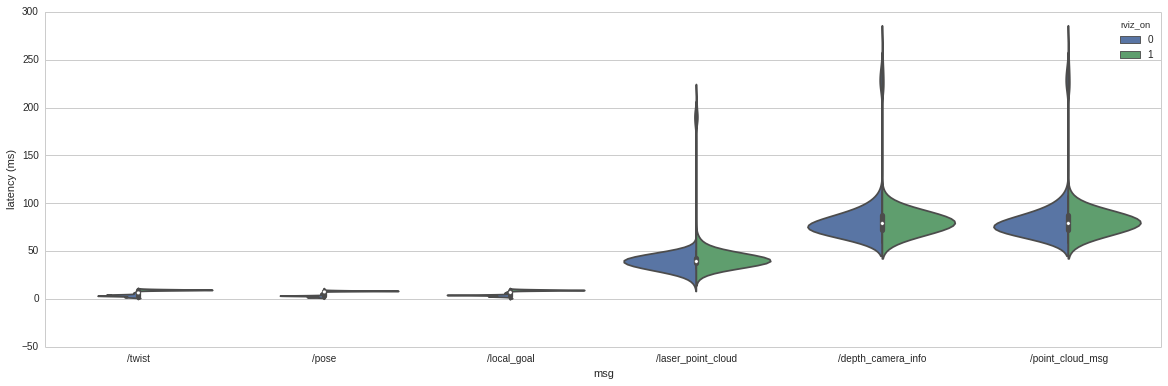

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
ax = sns.violinplot(x="msg", y="latency (ms)", hue="rviz_on", data=latency_df, split=True)

Zooming in on the three low-latency messages:

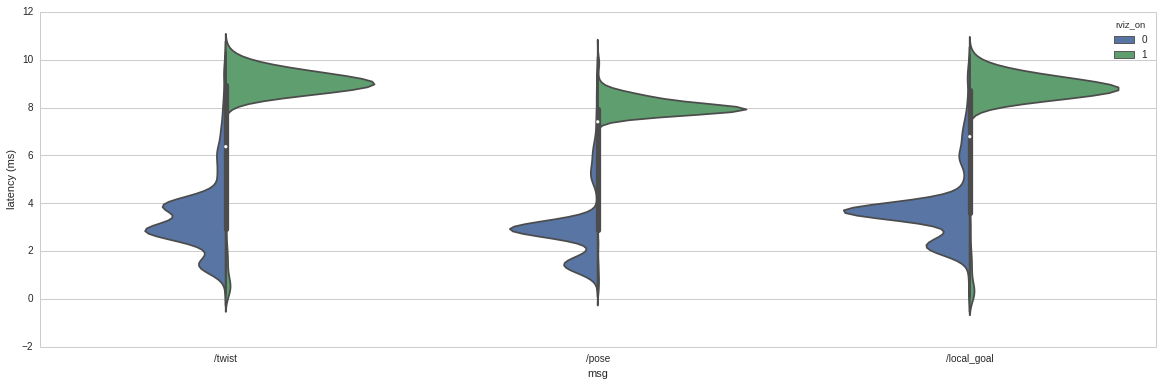

In [46]:
plt.figure(figsize=(20,6))
ax = sns.violinplot(x="msg"
                    , y="latency (ms)", 
                    hue="rviz_on", data=latency_df, split=True, order=["/twist", "/pose", "/local_goal"])

And zooming in on the three high-latency messages:

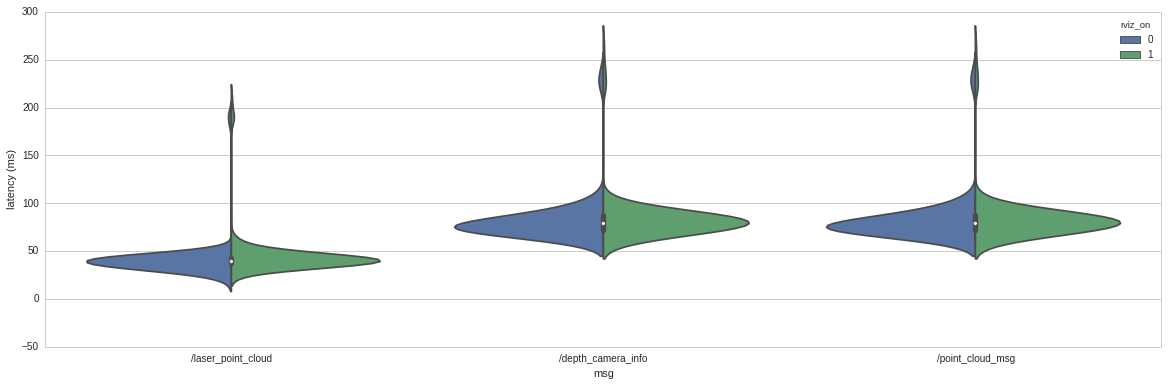

In [52]:
plt.figure(figsize=(20,6))
ax = sns.violinplot(x="msg"
                    , y="latency (ms)", 
                    hue="rviz_on", data=latency_df, split=True, 
                    order=["/laser_point_cloud", "/depth_camera_info", "/point_cloud_msg"])
                    
                    
                    

## Latencies from bagged data

Running the full replay script off bagged sensor, flea3, xtion data, for flight (flight_2017_02_20_15_53)

In [48]:
latency_columns = list(["msg", "seq", "stamp", "latency (ms)", "rviz_on"])
latency_df_bag = pd.DataFrame(columns=latency_columns)
with open('/home/peteflo/latency/sim_latency_10_bagreplay_beforerviz.txt') as f:
    lines = f.readlines()
    for line in lines:
        words = line.split()
        words[1] = int(words[1])
        words[2] = float(words[2])
        words[3] = 1000*float(words[3])
        latency_df_add = pd.DataFrame([words], columns=latency_columns)
        latency_df_bag = latency_df_bag.append(latency_df_add, ignore_index=True)

In [49]:
with open('/home/peteflo/latency/sim_latency_10_bagreplay_afterrviz.txt') as f:
    lines = f.readlines()
    for line in lines:
        words = line.split()
        words[1] = int(words[1])
        words[2] = float(words[2])
        words[3] = 1000*float(words[3])
        latency_df_add = pd.DataFrame([words], columns=latency_columns)
        latency_df_bag = latency_df_bag.append(latency_df_add, ignore_index=True)

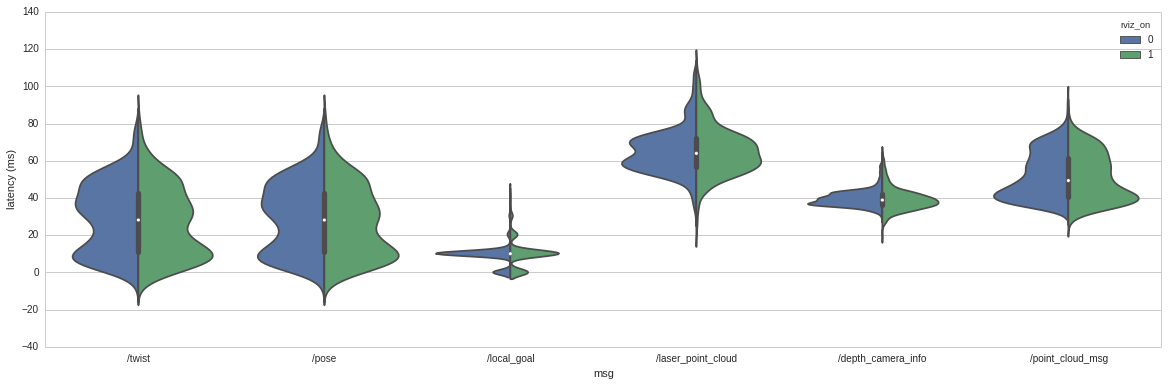

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
ax = sns.violinplot(x="msg", 
                    y="latency (ms)", 
                    hue="rviz_on", 
                    data=latency_df_bag, 
                    split=True,
                    order=["/twist", "/pose", "/local_goal", "/laser_point_cloud", "/depth_camera_info", "/point_cloud_msg"])

Experiment was repeated

In [55]:
latency_columns = list(["msg", "seq", "stamp", "latency (ms)", "rviz_on"])
latency_df_bag2 = pd.DataFrame(columns=latency_columns)
with open('/home/peteflo/latency/sim_latency_11_bagreplay_beforerviz.txt') as f:
    lines = f.readlines()
    for line in lines:
        words = line.split()
        words[1] = int(words[1])
        words[2] = float(words[2])
        words[3] = 1000*float(words[3])
        latency_df_add = pd.DataFrame([words], columns=latency_columns)
        latency_df_bag2 = latency_df_bag2.append(latency_df_add, ignore_index=True)

In [56]:
with open('/home/peteflo/latency/sim_latency_11_bagreplay_afterrviz.txt') as f:
    lines = f.readlines()
    for line in lines:
        words = line.split()
        words[1] = int(words[1])
        words[2] = float(words[2])
        words[3] = 1000*float(words[3])
        latency_df_add = pd.DataFrame([words], columns=latency_columns)
        latency_df_bag2 = latency_df_bag2.append(latency_df_add, ignore_index=True)

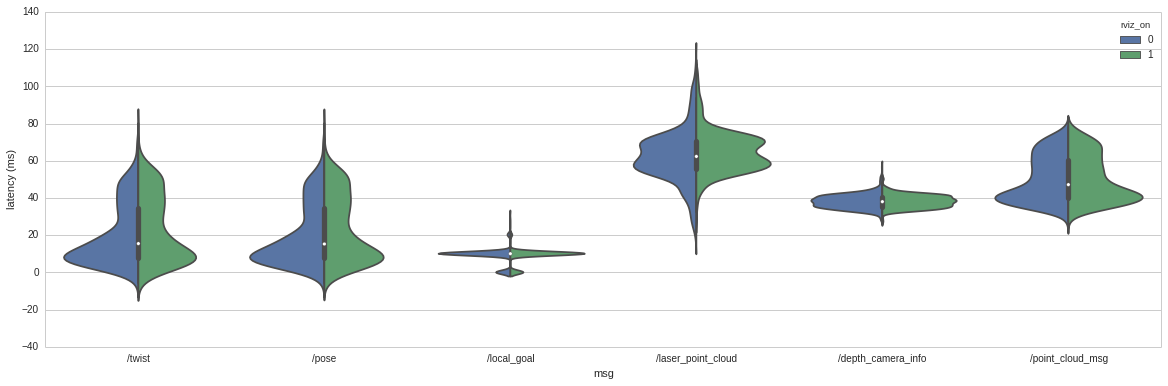

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
ax = sns.violinplot(x="msg", 
                    y="latency (ms)", 
                    hue="rviz_on", 
                    data=latency_df_bag2, 
                    split=True,
                    order=["/twist", "/pose", "/local_goal", "/laser_point_cloud", "/depth_camera_info", "/point_cloud_msg"])